# Part I - Web Log Data

## Overview

Analyse weblogs for a fictional hotel. Analysis is required to prepare a set of documentation for the hotel to allow them to understand the data being dealt with. Source codes is to explore the weblog, and afterwards the information is presented visually.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.



## 1.  Data ETL

### 1.1 Data Loading

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib


 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [ ]:
# Your code

from google.colab import drive
drive.mount('/content/drive')

from zipfile import ZipFile
all_files = ZipFile('/content/drive/MyDrive/HTWebLog_p1.zip','r')

file_names = all_files.namelist()

file_counts = 0

for name in file_names: 
  if name.endswith('.log'):
     file_counts += 1

print(file_counts)

ColumnNames=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username',
             'c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status']

def query_zip(name_of_file):
  zip_data = pd.read_csv(all_files.open(name_of_file), encoding = 'iso-8859-1', comment = '#', sep = " ", names = ColumnNames)
  return zip_data

all_data = [query_zip(name) for name in file_names]
df_ht = pd.concat(all_data)

Mounted at /content/drive
120


 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [ ]:
print(df_ht.info())
df_ht.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438930 entries, 0 to 63745
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   time             object 
 2   s-sitename       object 
 3   s-ip             object 
 4   cs-method        object 
 5   cs-uri-stem      object 
 6   cs-uri-query     object 
 7   s-port           float64
 8   cs-username      object 
 9   c-ip             object 
 10  cs(User-Agent)   object 
 11  cs(Referer)      object 
 12  sc-status        float64
 13  sc-substatus     float64
 14  sc-win32-status  float64
dtypes: float64(4), object(11)
memory usage: 1.0+ GB
None


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


### 1.2 Data Cleaning

#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**: 
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br> 
    3. Remove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


In [ ]:
#1. Check which columns have NAs
#    Assumption: I am converting "-" to NA for cs-uri-query, but deliberately not converting
#    'cs-username' to NA when value is "-" as the hyphen represents a value; anonymous user.
df_ht['cs-uri-query'] = df_ht['cs-uri-query'].replace("-", np.NaN)
print(df_ht.isna().sum())

#2. Remove all records with any NAs
#    Count the number of rows before removal NAs
len(df_ht)
#    As 'cs-uri-query column has > 15% NAs I have deleted the column.
del df_ht['cs-uri-query']
df_ht = df_ht.dropna()
len(df_ht)

date                     2
time                     2
s-sitename               2
s-ip                     2
cs-method                2
cs-uri-stem              2
cs-uri-query       7886534
s-port                   2
cs-username              2
c-ip                     2
cs(User-Agent)           2
cs(Referer)            751
sc-status              758
sc-substatus           758
sc-win32-status        758
dtype: int64


8438172

## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot 



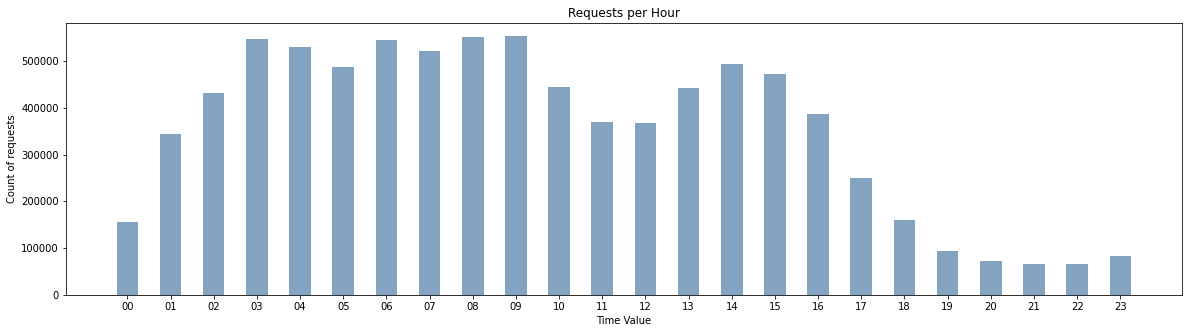

In [ ]:
# Create a bar chart of the number of server requests by hour of the day
#Filter date range, as per FAQ's
df2_1 = df_ht[(df_ht['date'] >= '2006-11-01') & (df_ht['date'] <= '2007-02-28')]

#Separate df2_1 into hourly groups in the 'data' list.
axis = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hours_count = df2_1['time'].str[:2].value_counts().rename_axis('hours').reset_index(name='counts')

#Sorting out the order of the X axis so that we have an intuitive chart
mapping = {hour: h for h, hour in enumerate(axis)}
key = hours_count['hours'].map(mapping)
hours_count = hours_count.iloc[key.argsort()]

#Plot
plt.figure(figsize = (20,5))
plt.bar(hours_count['hours'],hours_count['counts'], color=(0.2, 0.4, 0.6, 0.6), width=0.5)
plt.title("Requests per Hour")
plt.xlabel("Time Value")
plt.ylabel("Count of requests")
plt.show()


<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [ ]:
#Your code

hours_count[hours_count['counts'].between(400000,490000)]


,hours,counts
11,02,432357
7,05,487406
9,10,443515
10,13,442644
8,15,473162


### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

#### Server Status

12


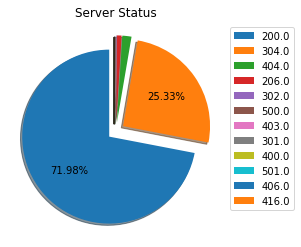

The number of types of statuses reported are: 12


In [ ]:
#How many types of status reported?
print(len(df_ht['sc-status'].unique()))
unique_sc_status = list(df_ht['sc-status'].unique())

sc_status_count = df_ht['sc-status'].value_counts().rename_axis('sc_status_code').reset_index(name='counts')
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ]

def remove_autopct(percentage):
    return ('%1.2f%%' % percentage) if percentage > 10 else ''

#Figure 'Server Status' in pie chart
plt.pie(sc_status_count['counts'], shadow=True, explode = explode, autopct=remove_autopct, startangle=90)
plt.title("Server Status")
plt.legend(labels=sc_status_count['sc_status_code'], bbox_to_anchor=(1,1), loc="upper left")
plt.show()

print("The number of types of statuses reported are:", len(sc_status_count['sc_status_code']))

### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [ ]:
!pip install ip2geotools

     |████████████████████████████████| 286kB 6.6MB/s 
     |████████████████████████████████| 747kB 8.6MB/s 
     |████████████████████████████████| 911kB 15.6MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 829kB 19.5MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 235kB 27.2MB/s 
     |████████████████████████████████| 348kB 30.4MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
     |████████████████████████████████| 112kB 36.6MB/s 
     |████████████████████████████████| 1.3MB 34.4MB/s 
     |████████████████████████████████| 143kB 47.0MB/s 
     |████████████████████████████████| 296kB 37.7MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 3.2MB 41.2MB/s 
  Creat

In [ ]:
from ip2geotools.databases.noncommercial import DbIpCity
#1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59.
df2_3A = df_ht[(df_ht['date'] == '2007-01-01') & (df_ht['time'] >= '20:00:00') & (df_ht['time'] <= '20:59:59')]
#2. Discover on the demographics by analysing requests from country level.
country_list = []
for ip in df2_3A['c-ip']:
  response = DbIpCity.get(ip, api_key='free')
  country = response.country
  country_list.append(country)

country_counts = pd.Series(country_list).value_counts().rename_axis('country').reset_index(name='counts')
print(country_counts)


  country  counts
0      HK     169
1      CN      25
2      US      16
3      IT       3
4      AU       1


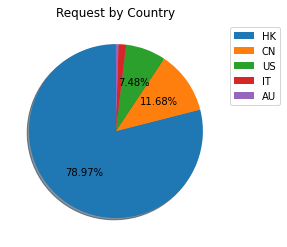

  country  counts
0      HK     169
1      CN      25
2      US      16


In [ ]:
#3. Plot countries of all requests in pie chart.

def remove_autopct5(percentage):
    return ('%1.2f%%' % percentage) if percentage > 5 else ''

plt.pie(country_counts['counts'], shadow=True, autopct=remove_autopct5, startangle=90)
plt.title("Request by Country")
plt.legend(labels=country_counts['country'], bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#4. List top 3 with the numbers of requests.
print(country_counts.nlargest(3,'counts'))


#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

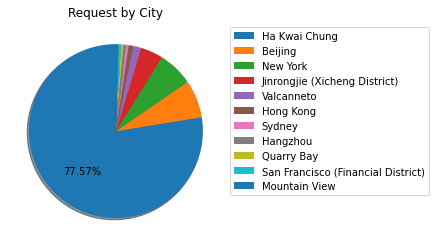

            city  counts
0  Ha Kwai Chung     166
1        Beijing      15
2       New York      14


In [ ]:
#1. Discover on the demographics by analysing requests from city level.
city_list = []
for ip in df2_3A['c-ip']:
  response = DbIpCity.get(ip, api_key='free')
  city = response.city
  city_list.append(city)

city_counts = pd.Series(city_list).value_counts().rename_axis('city').reset_index(name='counts')
#2. Plot cities of all requests in pie chart.
def remove_autopct5(percentage):
    return ('%1.2f%%' % percentage) if percentage > 5 else ''
    
plt.pie(city_counts['counts'], shadow=True, autopct=remove_autopct, startangle=90)
plt.title("Request by City")
plt.legend(labels=city_counts['city'], bbox_to_anchor=(1,1), loc="upper left")
plt.show()
#3. List top 3 with the numbers of requests.
print(city_counts.nlargest(3,'counts'))

# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 


In [ ]:
!pip install requests
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup


### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in School of of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [ ]:
# here we first define the parsing method, you will need to use this parsing method to format the professor full name and title from the staff page.
# the name of the professor from staff page will be split by space and last two words are full name 
def parse_name(stringtext):
  return " ".join(stringtext.split(" ")[-2:])," ".join(stringtext.split(" ")[:-2])

URL = 'https://www.deakin.edu.au/information-technology/staff-listing'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

staff_names = []
for a in soup.find_all(headers="table09355r1c1"):
  a = a.get_text(strip=True)
  if "Professor" in a:
    a = parse_name(a)
    staff_names.append(a)


In [ ]:
import pandas as pd
# the crawling information will be stored in pandas dataframe and then save as csv
# below you are required to use the parse_name method to crawl the professor's full name and title
# The column name must be same as the provided professor-list.csv


#Per question requirement, adding University Name in most efficient way as it is the same for each professor.
df3_2 = pd.DataFrame(staff_names, columns=['Name', 'Title'])
df3_2 = df3_2[df3_2['Title'].isin(['Emeritus Professor', 'Professor', 'Associate Professor'])]
df3_2['University Name'] = "Deakin University School of IT"

df3_2.to_csv('/content/drive/MyDrive/Professor-list.csv', index = False);
df3_2.head()

,Name,Title,University Name
0,Lynn Batten,Emeritus Professor,Deakin University School of IT
1,Andrzej Goscinski,Emeritus Professor,Deakin University School of IT
2,Jemal Abawajy,Professor,Deakin University School of IT
3,Maia Angelova,Professor,Deakin University School of IT
4,Gleb Beliakov,Professor,Deakin University School of IT


## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors 

<div class="alert alert-block alert-warning">

**Code**: 
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div> 



*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [ ]:
!pip install scholarly
from scholarly import scholarly

List_Name = []
List_citedby = []
List_citedby5y = []
List_hindex = []
List_hindex5y = []
List_i10index = []
List_i10index5y = []

for professor in df3_2['Name']:
  search_query = next(scholarly.search_author(professor), None)
  if search_query is None:
    List_Name.append(professor)
    List_citedby.append("NA")
    List_citedby5y.append("NA")
    List_hindex.append("NA")
    List_hindex5y.append("NA")
    List_i10index.append("NA")
    List_i10index5y.append("NA")

  else:
    stage = scholarly.fill(search_query, sections=['indices', 'counts'])
    Names = {key: stage[key] for key in stage.keys() & {'name'}}
    citedby = {key: stage[key] for key in stage.keys() & {'citedby'}}
    citedby5y =  {key: stage[key] for key in stage.keys() & {'citedby5y'}}
    hindex = {key: stage[key] for key in stage.keys() & {'hindex'}}
    hindex5y =  {key: stage[key] for key in stage.keys() & {'hindex5y'}}
    i10index =  {key: stage[key] for key in stage.keys() & {'i10index'}}    
    i10index5y = {key: stage[key] for key in stage.keys() & {'i10index5y'}}

    List_Name.append(Names.values())
    List_citedby.append(citedby.values())
    List_citedby5y.append(citedby5y.values())
    List_hindex.append(hindex.values())
    List_hindex5y.append(hindex5y.values())
    List_i10index.append(i10index.values())
    List_i10index5y.append(i10index5y.values())

List_of_lists = [List_Name, List_citedby,List_citedby5y,List_hindex,List_hindex5y,List_i10index,List_i10index5y]
Colheaders = ['Name','citation-all','citation-since2016','h-index-all','h-index-since2016','i10-index-all','i10-index-since2016']
Cols = ['citation-all','citation-since2016','h-index-all','h-index-since2016','i10-index-all','i10-index-since2016']
df4_1 = pd.DataFrame(list(zip(List_Name, List_citedby,List_citedby5y,List_hindex,List_hindex5y,List_i10index,List_i10index5y)), columns= Colheaders)

df4_1['Name'] = df4_1['Name'].str.join('')
df4_1['citation-all'] = pd.DataFrame.from_dict(List_citedby)
df4_1['citation-since2016'] = pd.DataFrame.from_dict(List_citedby5y)
df4_1['h-index-all'] = pd.DataFrame.from_dict(List_hindex)
df4_1['h-index-since2016'] = pd.DataFrame.from_dict(List_hindex5y)
df4_1['i10-index-all'] = pd.DataFrame.from_dict(List_i10index)
df4_1['i10-index-since2016'] = pd.DataFrame.from_dict(List_i10index5y)

df4_1[Cols] = df4_1[['citation-all','citation-since2016','h-index-all','h-index-since2016','i10-index-all','i10-index-since2016']].apply(pd.to_numeric, errors='coerce')
df4_1['Name'] = df4_1['Name'].map(lambda x: x.lstrip('+-').rstrip('(刘晓)'))
df4_1 = (pd.merge(df4_1, df3_2, on='Name'))
df4_1 = df4_1.drop(['University Name'], axis=1)

df4_1 = df4_1[['Name', 'Title', 'citation-all', 'citation-since2016', 'h-index-all', 'h-index-since2016', 'i10-index-all', 'i10-index-since2016']]

df4_1.to_csv('/content/drive/MyDrive/Professor-citation-information.csv', index = False, na_rep='NA');
df4_1.head()

     |████████████████████████████████| 9.2MB 9.5MB/s 
     |████████████████████████████████| 2.9MB 54.7MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 552kB 49.5MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
  Created wheel for stem: filename=stem-1.8.0-cp37-none-any.whl size=436039 sha256=5606002b5fa433fd9c1dfc70208c09bd3231abdc2d7f15a83fc16dfb88557859
  Stored in directory: /root/.cache/pip/wheels/02/3a/ee/1094b166e029353f892c0b121aa02f48aff5e658396924bc2a
  Created wheel for bibtexparser: filename=bibtexparser-1.2.0-cp37-none-any.whl size=36712 sha256=207fb7eba9077e4fcad90018fb09cb00de17793e7b3bd9f2d8c163addd013997
  Stored in directory: /root/.cache/pip/wheels/b2/5a/e7/867bcbc3a81c15b675b931aa19b6698375c5a5e90419a366db
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=d014591fa633b449eebff663758abb3632798b3a1ce

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
0,Lynn Batten,Emeritus Professor,2528.0,1172.0,23.0,16.0,45.0,21.0
1,Andrzej Goscinski,Emeritus Professor,NaN,NaN,NaN,NaN,NaN,NaN
2,Jemal Abawajy,Professor,NaN,NaN,NaN,NaN,NaN,NaN
3,Maia Angelova,Professor,680.0,397.0,15.0,11.0,21.0,14.0
4,Gleb Beliakov,Professor,8173.0,4632.0,42.0,32.0,135.0,86.0


### 4.2 Find out the professor name having the most citations 

<div class="alert alert-block alert-warning">

**Code**: 
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)
</div>

In [ ]:
# find out the professor name having the most citations (please remove those professor who does not have google scholar page)


#Drop NaN's
df4_2 = df4_1.dropna()

#Method specifically using sort/print method per assignment instructions
df4_2 = df4_2.sort_values(['citation-all'], ascending=[False])
print(df4_2.iloc[[0]])

#Alternate method to return row name of professor with the most citations
df4_2[df4_2['citation-all'] == df4_2['citation-all'].max()]

       Name                Title  ...  i10-index-all  i10-index-since2016
15  Gang Li  Associate Professor  ...          144.0                130.0

[1 rows x 8 columns]


,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
15,Gang Li,Associate Professor,64375.0,30610.0,75.0,60.0,144.0,130.0


### 4.3 Find out the row for associate professor having the most i10-index since 2016 
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)
</div>



In [ ]:
# find out the row for associate professor having the most i10_index since 2016 (please remove those professor who does not have google scholar page)


#Method specifically using sort/print method per assignment instructions
df4_2 = df4_2.sort_values(['i10-index-since2016'], ascending=[False])
print(df4_2.iloc[[0]])

#Alternate method to return row name of professor with the most citations
df4_2[df4_2['i10-index-since2016'] == df4_2['i10-index-since2016'].max()]

       Name                Title  ...  i10-index-all  i10-index-since2016
15  Gang Li  Associate Professor  ...          144.0                130.0

[1 rows x 8 columns]


,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
15,Gang Li,Associate Professor,64375.0,30610.0,75.0,60.0,144.0,130.0


### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**: 
    Find out all the professors name who has the citations_since2016 > 2500 (please remove those professor who does not have google scholar page)
</div>

In [ ]:
# find out all the professors name who has the citations_since2016 > 2500

df4_4 = df4_2[df4_2['citation-since2016'] > 2500] 
#Method specifically printing per assignment instructions
print(df4_4['Name'])
#Easier to read method to return citations_since2016 > 2500
df4_4.head()

15             Gang Li
16          Jianxin Li
4        Gleb Beliakov
11    Arkady Zaslavsky
Name: Name, dtype: object


,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
15,Gang Li,Associate Professor,64375.0,30610.0,75.0,60.0,144.0,130.0
16,Jianxin Li,Associate Professor,6005.0,4308.0,43.0,34.0,117.0,105.0
4,Gleb Beliakov,Professor,8173.0,4632.0,42.0,32.0,135.0,86.0
11,Arkady Zaslavsky,Professor,14930.0,8330.0,50.0,33.0,177.0,80.0
